In [1]:
# Machine Learning Final Project 

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import sklearn 



In [2]:
dataset = pd.read_csv('Engineering_graduate_salary.csv')
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [4]:
dataset['GraduationYear'].unique()

array([2013, 2014, 2011, 2012, 2010, 2015, 2009, 2017, 2016,    0, 2007],
      dtype=int64)

In [5]:
dataset['Degree'].unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [6]:
cols=dataset.columns
for col in cols:
    print('Number of unique categories for', col, 'are:' ,dataset[col].nunique())

Number of unique categories for ID are: 2998
Number of unique categories for Gender are: 2
Number of unique categories for DOB are: 1633
Number of unique categories for 10percentage are: 736
Number of unique categories for 10board are: 221
Number of unique categories for 12graduation are: 13
Number of unique categories for 12percentage are: 717
Number of unique categories for 12board are: 277
Number of unique categories for CollegeID are: 1173
Number of unique categories for CollegeTier are: 2
Number of unique categories for Degree are: 4
Number of unique categories for Specialization are: 42
Number of unique categories for collegeGPA are: 1064
Number of unique categories for CollegeCityID are: 1173
Number of unique categories for CollegeCityTier are: 2
Number of unique categories for CollegeState are: 26
Number of unique categories for GraduationYear are: 11
Number of unique categories for English are: 109
Number of unique categories for Logical are: 104
Number of unique categories fo

In [7]:
dataset.corr()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,1.000000,0.043516,0.671106,0.002656,0.277359,0.025566,0.024103,0.277359,-0.023194,0.021851,...,-0.049300,0.105806,-0.054466,-0.035765,0.181181,0.028239,0.108289,-0.140190,0.027661,-0.250228
10percentage,0.043516,1.000000,0.273813,0.645578,0.028314,-0.144178,0.311209,0.028314,0.114770,-0.017208,...,0.053343,0.065815,0.049500,0.021410,0.066644,0.136332,-0.007811,-0.131151,0.034869,0.181414
12graduation,0.671106,0.273813,1.000000,0.255780,0.247979,0.004834,0.059786,0.247979,0.005517,0.006758,...,0.025015,0.124642,0.025286,-0.003610,0.110645,0.050309,0.055530,-0.076572,-0.015313,-0.161793
12percentage,0.002656,0.645578,0.255780,1.000000,0.027538,-0.113101,0.335041,0.027538,0.119783,-0.015845,...,0.041109,0.065761,0.055003,0.002204,0.057277,0.099645,-0.012765,-0.088635,0.007041,0.172755
CollegeID,0.277359,0.028314,0.247979,0.027538,1.000000,0.072848,0.002161,1.000000,0.026276,-0.003479,...,-0.020409,0.024191,0.031839,0.003540,0.073101,0.004176,0.008856,-0.003315,0.005774,-0.114908
CollegeTier,0.025566,-0.144178,0.004834,-0.113101,0.072848,1.000000,-0.088604,0.072848,-0.094247,-0.006719,...,-0.029641,0.006484,-0.008976,-0.000627,0.045099,-0.042588,-0.010184,0.033292,-0.029322,-0.177975
collegeGPA,0.024103,0.311209,0.059786,0.335041,0.002161,-0.088604,1.000000,0.002161,0.030960,0.008562,...,-0.040812,0.056289,-0.002096,-0.039379,0.052435,0.060789,-0.050995,-0.067701,0.013691,0.131912
CollegeCityID,0.277359,0.028314,0.247979,0.027538,1.000000,0.072848,0.002161,1.000000,0.026276,-0.003479,...,-0.020409,0.024191,0.031839,0.003540,0.073101,0.004176,0.008856,-0.003315,0.005774,-0.114908
CollegeCityTier,-0.023194,0.114770,0.005517,0.119783,0.026276,-0.094247,0.030960,0.026276,1.000000,0.010217,...,-0.052892,0.000664,0.056309,-0.018694,0.008559,0.010270,0.003624,0.020456,-0.008650,0.011149
GraduationYear,0.021851,-0.017208,0.006758,-0.015845,-0.003479,-0.006719,0.008562,-0.003479,0.010217,1.000000,...,-0.076916,0.008299,0.004720,0.000920,-0.016745,-0.003956,0.007781,0.001144,0.019407,-0.009333


<AxesSubplot:>

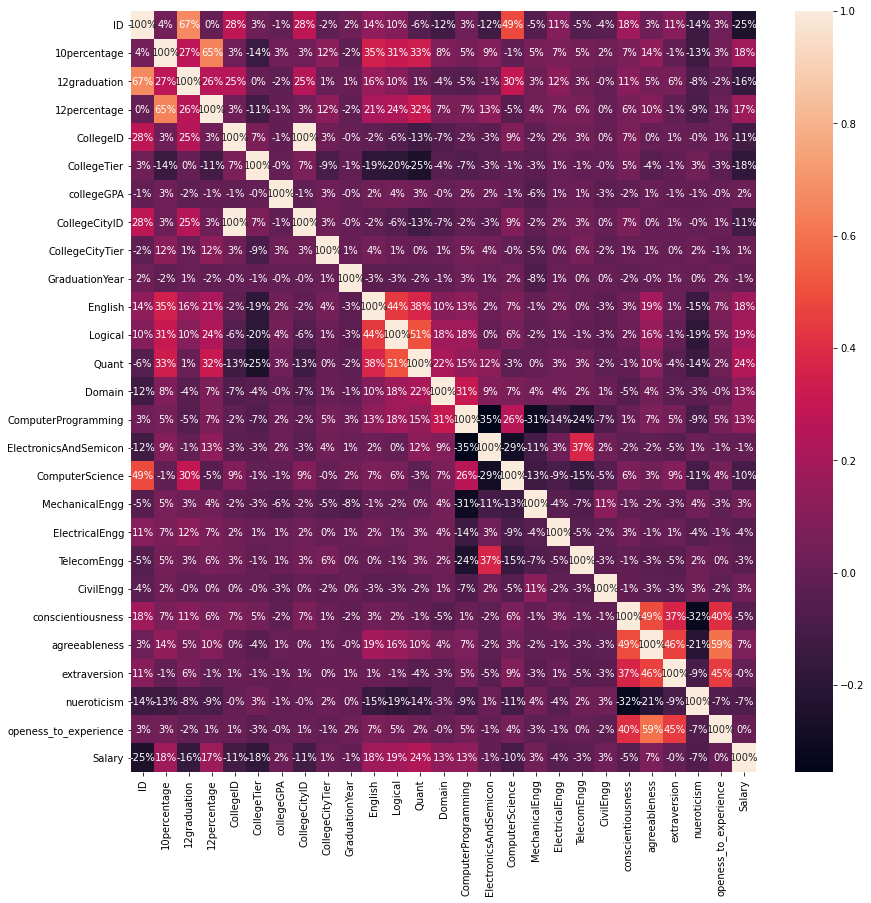

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(dataset.corr(), annot=True,fmt='.0%')

In [9]:
data = pd.get_dummies(dataset,drop_first=True)
data.head()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,604399,87.80,2009,84.00,6920,1,73.82,6920,1,2013,...,0,0,0,0,0,0,0,0,0,0
1,988334,57.00,2010,64.50,6624,2,65.00,6624,0,2014,...,0,0,0,0,0,0,0,1,0,0
2,301647,77.33,2007,85.17,9084,2,61.94,9084,0,2011,...,0,0,0,0,0,0,0,0,0,0
3,582313,84.30,2009,86.00,8195,1,80.40,8195,1,2013,...,0,0,0,0,0,0,0,0,0,0
4,339001,82.00,2008,75.00,4889,2,64.30,4889,1,2012,...,0,0,0,0,1,0,0,0,0,0


In [10]:
data.shape

(2998, 2225)

In [11]:
X = data.drop(['Salary'], axis=1)
y = data['Salary']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [13]:
X_train.head()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
2085,308793,82.40,2008,82.20,5904,2,76.60,5904,0,2012,...,0,0,0,0,0,0,0,1,0,0
477,453953,69.33,2004,56.00,5086,2,68.56,5086,0,2010,...,0,0,0,0,0,0,0,0,0,0
1722,505714,46.80,2009,72.48,165,2,59.70,165,1,2012,...,0,0,1,0,0,0,0,0,0,0
1063,1034780,72.75,2009,65.40,11167,2,79.00,11167,1,2013,...,0,0,0,0,0,0,0,0,0,1
2057,121780,92.00,2007,86.29,1294,2,77.14,1294,0,2010,...,0,0,0,0,1,0,0,0,0,0


In [14]:
#Setting Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
Ypred=model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score
r_sqrd = r2_score(Y_test,Ypred)
r_sqrd 

-0.07593663693659591

In [18]:
# Different Quarters
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1 
print('---------IQR-------------------')
print(IQR)
print('---------Q1--------------------')
print(Q1)
print('---------Q3--------------------')
print(Q3)

---------IQR-------------------
ID                       661712.250000
10percentage                 14.460000
12graduation                  2.000000
12percentage                 16.600000
CollegeID                  8296.000000
CollegeTier                   0.000000
collegeGPA                    9.770000
CollegeCityID              8296.000000
CollegeCityTier               1.000000
GraduationYear                2.000000
English                     145.000000
Logical                     123.750000
Quant                       165.000000
Domain                        0.493297
ComputerProgramming         200.000000
ElectronicsAndSemicon       234.000000
ComputerScience               0.000000
MechanicalEngg                0.000000
ElectricalEngg                0.000000
TelecomEngg                   0.000000
CivilEngg                     0.000000
conscientiousness             1.351800
agreeableness                 1.248100
extraversion                  1.276800
nueroticism                   1.

In [19]:
dataset.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

,0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99,1.00
ID,37995.550000,103777.7500,212692.000000,333464.750000,639694.500000,995177.000000,1.171265e+06,1.241874e+06,1.280023e+06,1.297877e+06
10percentage,51.823100,59.0000,64.000000,71.140000,78.965000,85.600000,8.980000e+01,9.160000e+01,9.440000e+01,9.776000e+01
12graduation,2004.000000,2005.0000,2006.000000,2007.000000,2008.000000,2009.000000,2.010000e+03,2.010000e+03,2.011000e+03,2.012000e+03
12percentage,50.000000,56.0000,60.200000,66.000000,74.000000,82.600000,8.980000e+01,9.300000e+01,9.600000e+01,9.870000e+01
CollegeID,32.880000,55.0000,127.000000,526.250000,4027.500000,8822.250000,1.202200e+04,1.400400e+04,1.639832e+04,1.840900e+04
CollegeTier,1.000000,1.0000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
collegeGPA,54.992500,60.0000,62.000000,66.530000,71.800000,76.300000,8.100000e+01,8.400000e+01,9.000000e+01,9.993000e+01
CollegeCityID,32.880000,55.0000,127.000000,526.250000,4027.500000,8822.250000,1.202200e+04,1.400400e+04,1.639832e+04,1.840900e+04
CollegeCityTier,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
GraduationYear,2010.000000,2010.0000,2011.000000,2012.000000,2013.000000,2014.000000,2.014000e+03,2.014000e+03,2.015000e+03,2.017000e+03


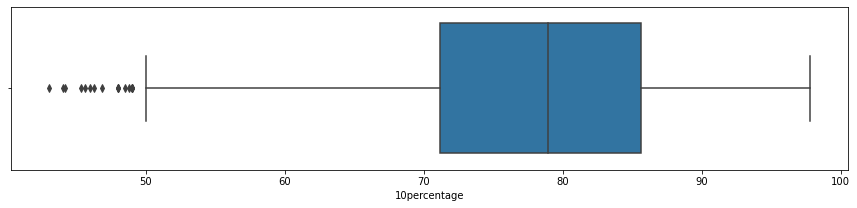

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(15,3))
sns.boxplot(x=dataset['10percentage'])
plt.show()

In [21]:
lower_limit = 72 - 1.5 * 14.4
lower_limit

50.4

In [22]:
dataset['10percentage']=dataset["10percentage"].map(lambda x:51 if x <51 else x)

In [23]:
dataset['10percentage'].head()

0    87.80
1    57.00
2    77.33
3    84.30
4    82.00
Name: 10percentage, dtype: float64

<AxesSubplot:xlabel='12percentage'>

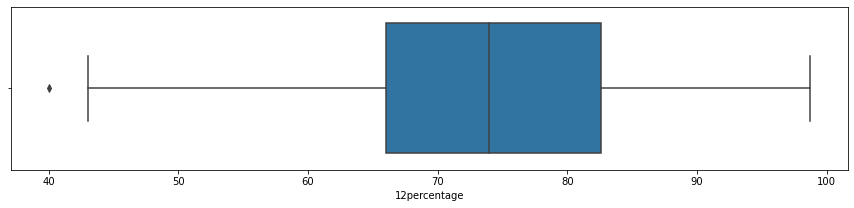

In [24]:
plt.figure(figsize=(15,3))
sns.boxplot(x=dataset['12percentage'])

In [25]:
lower_limit = 66.4 - 1.5 * 16.6
lower_limit

41.5

<AxesSubplot:xlabel='collegeGPA'>

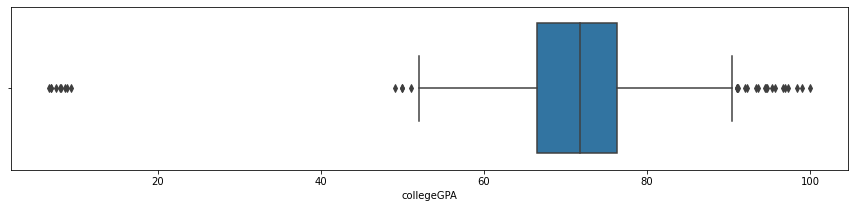

In [26]:
plt.figure(figsize=(15,3))
sns.boxplot(x=dataset['collegeGPA'])

In [27]:
lower_limit = 6.66 - 1.5 * 0.95
lower_limit

5.235

In [28]:
upper_limit = 7.63 + 1.5 * 0.95
upper_limit

9.055

In [29]:
dataset['collegeGPA']=dataset["collegeGPA"].map(lambda x:5 if x <5 else x)

In [30]:
dataset['collegeGPA']=dataset["collegeGPA"].map(lambda x:9.055 if x >9.055 else x)

<AxesSubplot:xlabel='conscientiousness'>

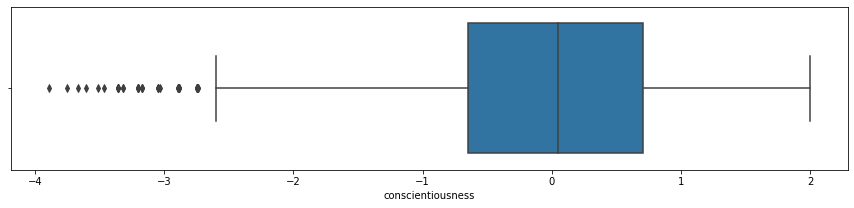

In [31]:
plt.figure(figsize=(15,3))
sns.boxplot(x=dataset['conscientiousness'])

<AxesSubplot:xlabel='agreeableness'>

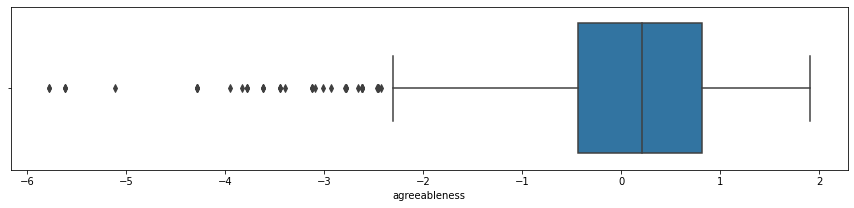

In [32]:
plt.figure(figsize=(15,3))
sns.boxplot(x=dataset['agreeableness'])

In [33]:
new_dataset = pd.get_dummies(dataset,drop_first=True)
new_dataset.shape

(2998, 2225)

In [34]:
n_train = new_dataset.loc[:2997]

In [35]:
n_test = new_dataset.loc[2998:]

In [36]:
X = n_train.drop(['Salary'],axis=1)
Y = n_train['Salary']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 3, test_size=0.2)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

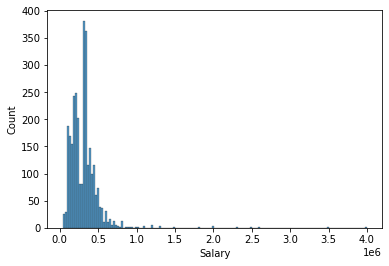

In [38]:
sns.histplot(n_train['Salary'])

In [39]:
#Linear Regression

from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()
model.fit(X_train, Y_train)
model_pred = model.predict(X_test)